# Statistiche e grafici delle risoluzioni dei cubi di Rubik

In [7]:
from pandas import read_csv
import modulo_rubik

df = read_csv("../database.csv", sep="\t", parse_dates=["Data"])
# Inserimento colonna "Tempo" con i secondi convertiti in minuti e secondi
df.insert(loc=2, column="Tempo", value=df["Secondi"].apply(modulo_rubik.conversione_secondi))

## Record personali per tipo di cubo 🥇🥈🥉

In [8]:
# Elenco di tutti i record
modulo_rubik.mostra_record(df_cubo=df)

                Tempo
Cubo                 
2x2x2      (0, 15.12)
3x3x3      (0, 40.44)
4x4x4       (3, 5.99)
mirror     (3, 58.89)
kilominx    (5, 5.67)
5x5x5      (7, 49.48)
megaminx  (30, 10.61)


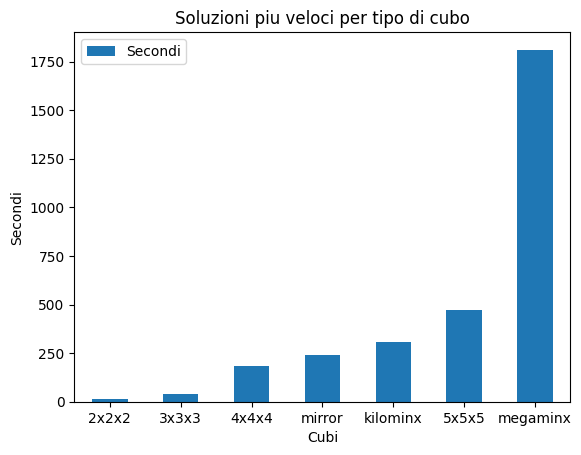

In [9]:
# Creazione grafico di tutti i record
modulo_rubik.grafico_tutti_record(df_cubo=df)

## Medie dei tempi di risoluzione

In [10]:
# Tempi medi di risoluzioni
modulo_rubik.calcola_media_risoluzioni(df_cubo=df)

Media in secondi

 Cubo
2x2x2         60.61
3x3x3         71.07
4x4x4        257.31
5x5x5        690.12
kilominx     452.89
megaminx    2155.38
mirror       501.32
Name: Secondi, dtype: float64 

Media in minuti e secondi

Cubo     Minuti e secondi
2x2x2 	 (1, 0.61)
3x3x3 	 (1, 11.07)
4x4x4 	 (4, 17.31)
5x5x5 	 (11, 30.12)
kilominx 	 (7, 32.89)
megaminx 	 (35, 55.38)
mirror 	 (8, 21.32)


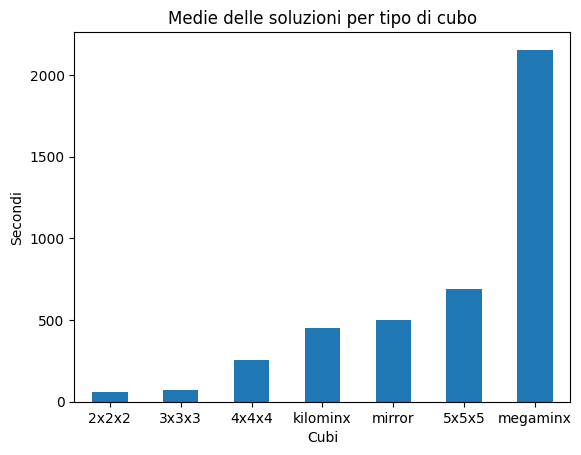

In [11]:
# Creazione grafico dei tempi medi di risoluzioni
modulo_rubik.grafico_media_risoluzioni(df_cubo=df)

## Numero di risoluzioni

In [12]:
# Numero di risoluzioni dei diversi cubi
modulo_rubik.calcola_num_risoluzioni(df_cubo=df)

Cubo
3x3x3       75
4x4x4       63
2x2x2       55
5x5x5       32
kilominx    15
mirror      13
megaminx     3
Name: count, dtype: int64


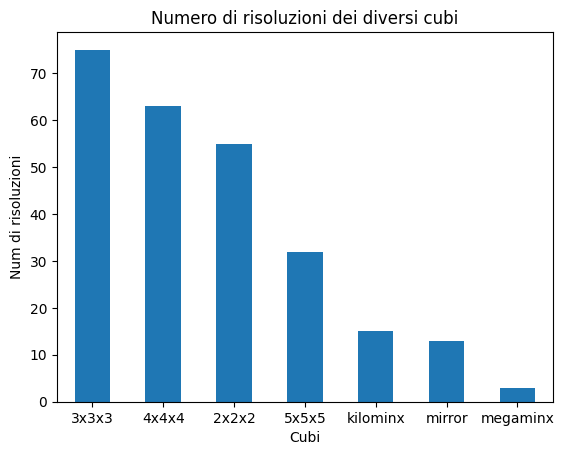

In [13]:
# Creazione grafico delle risoluzioni dei diversi cubi
modulo_rubik.grafico_num_risoluzioni(df_cubo=df)

In [14]:
# Aggiunta colonna data al DataFrame
df = modulo_rubik.aggiunta_colonne_data(df_cubo=df)

In [15]:
# Numero di risoluzioni del 2025 per ogni mese
df[df["Anno"] == 2025]["Mese"].value_counts()

Mese
Gen    41
Feb    35
Ago    29
Nov    25
Mag    24
Lug    14
Set    12
Mar    12
Ott     6
Apr     2
Name: count, dtype: int64

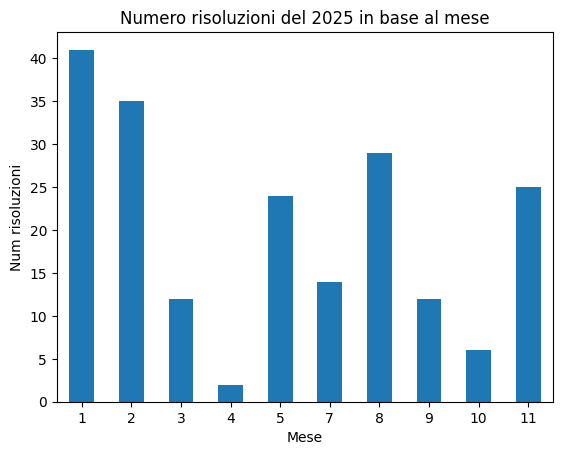

In [16]:
# Grafico del numero di risoluzioni del 2025 mese per mese
modulo_rubik.grafico_risoluz_mensile(df_cubo=df, anno=2025)

In [17]:
# Numero di risoluzioni del 2026 per ogni mese
df[df["Anno"] == 2026]["Mese"].value_counts()

Mese
Feb    39
Gen    17
Name: count, dtype: int64

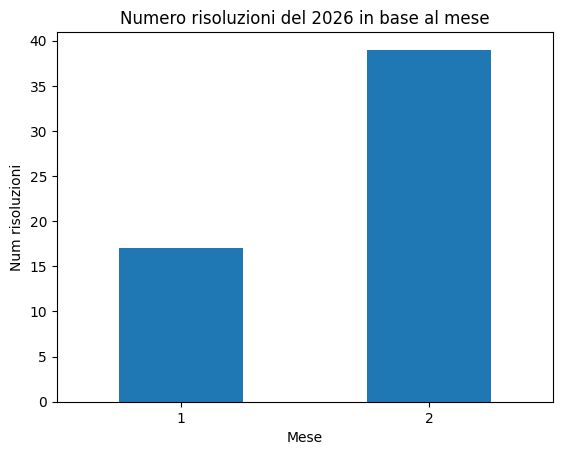

In [18]:
# Grafico del numero di risoluzioni del 2026 mese per mese
modulo_rubik.grafico_risoluz_mensile(df_cubo=df, anno=2026)

In [19]:
# Ultime 10 risoluzioni
df.tail(10)

,Data completa,Anno,Mese,Giorno,Secondi,Tempo,Cubo
246,2026-02-20,2026,Feb,20,504.70,"(8, 24.7)",kilominx
247,2026-02-21,2026,Feb,21,51.66,"(0, 51.66)",3x3x3
248,2026-02-21,2026,Feb,21,55.81,"(0, 55.81)",3x3x3
249,2026-02-21,2026,Feb,21,49.44,"(0, 49.44)",3x3x3
250,2026-02-21,2026,Feb,21,532.30,"(8, 52.3)",kilominx
251,2026-02-21,2026,Feb,21,305.67,"(5, 5.67)",kilominx
252,2026-02-21,2026,Feb,21,329.05,"(5, 29.05)",kilominx
253,2026-02-22,2026,Feb,22,555.94,"(9, 15.94)",5x5x5
254,2026-02-22,2026,Feb,22,320.07,"(5, 20.07)",kilominx
255,2026-02-22,2026,Feb,22,407.63,"(6, 47.63)",kilominx
